<a href="https://colab.research.google.com/github/supriyo-1207/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart_Disease_Prediction  using ML**

#Connect google drive for access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import all necessary library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


#import the heart disease data set

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/Heart_Disease_Prediction.csv')

#check the size of the data set

In [ ]:
df.shape

(270, 14)

#check the columns names

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

from above columns we understand that Heart disease column are target column and others are input column

#check the null values, datatypes of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

after above result we can conclud that there is no null values and target variable datatype is object ... so it need to encoding to better understand to the model

#We check first 5 rows to understand the datasets better:

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Heart Disease column are two class Presence and Absence  and there is no order...

In [ ]:
print(df["Heart Disease"].unique())

['Presence' 'Absence']


In [ ]:
df["Heart Disease"]=df["Heart Disease"].map({'Presence':1,'Absence':0})

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


encode the categorical data for model understand the better

#Spilit the data independent variable and depenedent variable

In [ ]:
x=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']

#divede the data into test and train

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


set the test size 0.2 because we give the 80%data for train and 20% data for test

#import the logistic regression model

In [ ]:
model=LogisticRegression()

#Train our model

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
conf_matrix=confusion_matrix(y_test,y_predict)
conf_matrix

array([[32,  1],
       [ 4, 17]])

In [ ]:
class_report=classification_report(y_test,y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



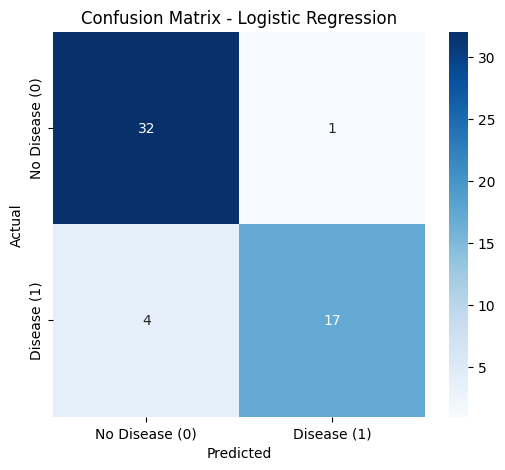

In [ ]:
#confusion matrix
conf_matrix = [[32, 1],
      [4, 17]]

labels = ['No Disease (0)', 'Disease (1)']

# Plotting
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()